# Figure S8

In [2]:

from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile



import glob

def significance_stars(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'ns'

# Asthetics

In [3]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713", "#6A6969"]
palette = sns.color_palette(colors)
n = 1

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": n, 'axes.linewidth':n, 
                                  "xtick.major.width":n,"ytick.major.width":n}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863),
 (0.41568627450980394, 0.4117647058823529, 0.4117647058823529)]

In [10]:
df2 = pd.read_csv("FigureS8_Partitioning.csv")

/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_14883/3609558134.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(yticks = np.linspace(0, 200, 3), xlabel = "", ylabel = "", ylim=(0, 210), xticklabels=[""], xticks=())


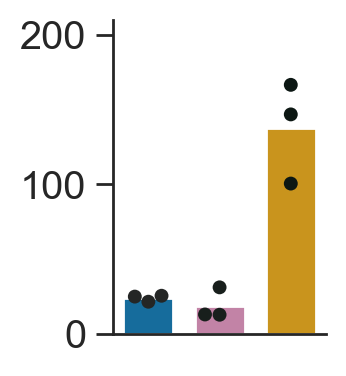

In [11]:
# Example usage:

fig, ax = plt.subplots(figsize = (2.,2.15), dpi = 200)


sns.despine(fig, top = True, right = True)


ax.set(xlabel = "", ylabel = "", yticks = np.linspace(0, 4, 3))



sns.swarmplot(data = df2, x = "Sample", y = "Partioning", hue = "Sample",
              palette='dark:#0C1713', legend=False, ax = ax, s = 5,
              dodge=False)
 
sns.barplot(data = df2, x = "Sample", y = "Partioning", hue = "Sample",
             legend=False, 
             ax = ax, 
             dodge=None, 
             errorbar=None,  width=.7, palette= [ "C7","C2","C4"]) 

ax.set(yticks = np.linspace(0, 200, 3), xlabel = "", ylabel = "", ylim=(0, 210), xticklabels=[""], xticks=())

plt.tight_layout()




In [12]:
import pingouin as pg


In [13]:
df2.groupby("Type")["Partioning"].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
C3,3.0,19.023249,10.513713,12.866682,12.953361,13.040040,22.101533,31.163027
Cu,3.0,24.030344,2.155767,21.562800,23.271378,24.979955,25.264117,25.548278
KR3,3.0,137.861944,33.845839,100.479574,123.580269,146.680965,156.553129,166.425293


In [14]:
a = pg.pairwise_tukey(data = df2, dv = "Partioning", between = "Type")
a["Significance"] = a['p-tukey'].apply(significance_stars)
a

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges,Significance
0,C3,Cu,19.023249,24.030344,-5.007095,16.738023,-0.299145,0.952254,-0.527827,ns
1,C3,KR3,19.023249,137.861944,-118.838695,16.738023,-7.099924,0.000957,-3.793625,***
2,Cu,KR3,24.030344,137.861944,-113.831600,16.738023,-6.800779,0.001206,-3.797374,**
